# Clustering

Clustering is an unsupervised learning method that divides the population or data points into a number of groups or clusters such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

It can also be described as a grouping of data on the basis of similarity and dissimilarity between them.

Here is a simple clustering algorithm

/Users/johnmoses/miniconda3/envs/mconda38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


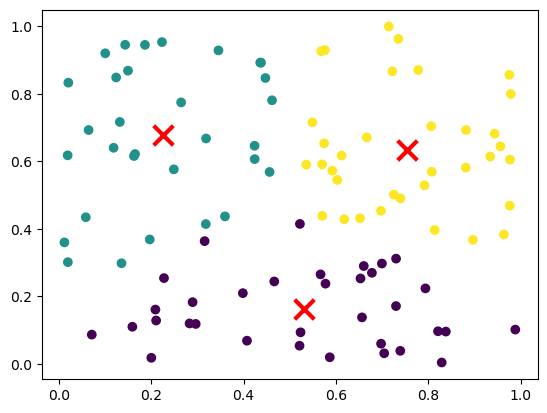

In [1]:
""" 
Generate a simple clustering algorithm
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Plot the data and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

## K-Means Clustering

This is a method of vector quantization that seeks to partition n observations into k clusters, putting each observation to the cluster with the nearest mean.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

## Get Dataset

In [7]:
np.random.seed(42)

In [8]:
# Load data
X = np.loadtxt('../xdata/clustering.txt', delimiter=',')
X

array([[ 2.08,  1.05],
       [ 2.05,  7.7 ],
       [ 4.53,  5.49],
       [ 6.23,  1.02],
       [ 5.35,  7.86],
       [ 2.88,  0.79],
       [ 2.32,  8.5 ],
       [ 5.06,  5.65],
       [ 5.38,  3.53],
       [ 6.31,  9.73],
       [ 3.41,  2.05],
       [ 1.75,  7.38],
       [ 3.88,  5.73],
       [ 7.22,  2.88],
       [ 5.85,  9.11],
       [ 3.66,  2.38],
       [ 0.45,  7.99],
       [ 6.01,  5.83],
       [ 7.06,  2.41],
       [ 7.47,  8.97],
       [ 2.2 ,  2.71],
       [ 2.94,  8.71],
       [ 5.87,  4.56],
       [ 4.57,  1.33],
       [ 5.84,  6.54],
       [ 3.4 ,  1.  ],
       [ 1.44,  8.26],
       [ 4.29,  4.69],
       [ 8.09,  1.99],
       [ 6.48,  9.44],
       [ 2.94,  1.78],
       [ 0.41,  9.14],
       [ 5.42,  4.08],
       [ 7.47,  2.15],
       [ 5.62,  7.65],
       [ 3.71,  1.26],
       [ 0.41,  8.9 ],
       [ 4.93,  5.73],
       [ 7.23,  0.14],
       [ 6.77,  9.09],
       [ 3.23,  2.64],
       [ 1.61,  7.85],
       [ 4.7 ,  4.78],
       [ 6.

## Visualize data

([], [])

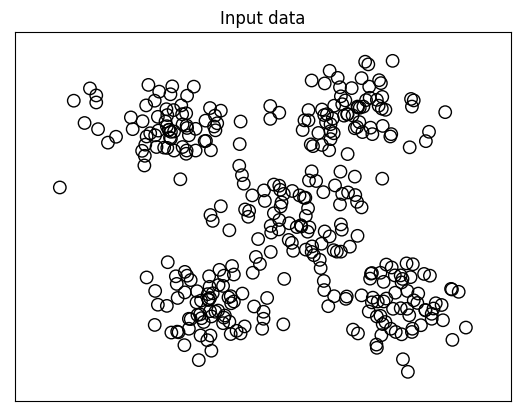

In [9]:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## Train model

In [11]:
# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)

# Train model
kmeans.fit(X)

# Set step size of mesh
step_size = 0.01

In [12]:
# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

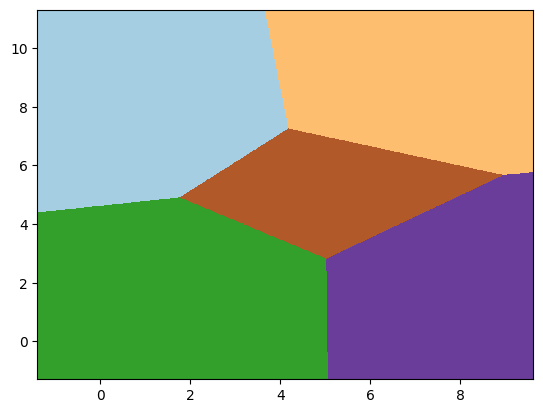

In [13]:
# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

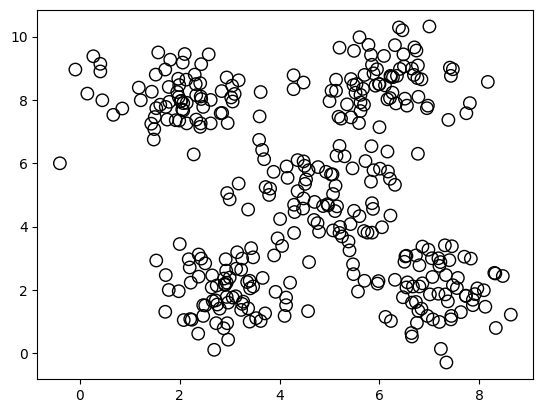

In [14]:
# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)

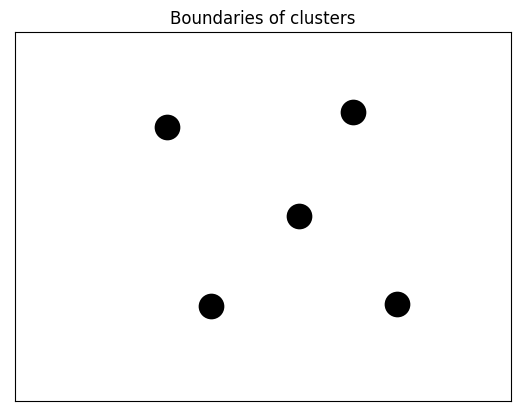

In [15]:
# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Another K-Means example

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [17]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [18]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [19]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

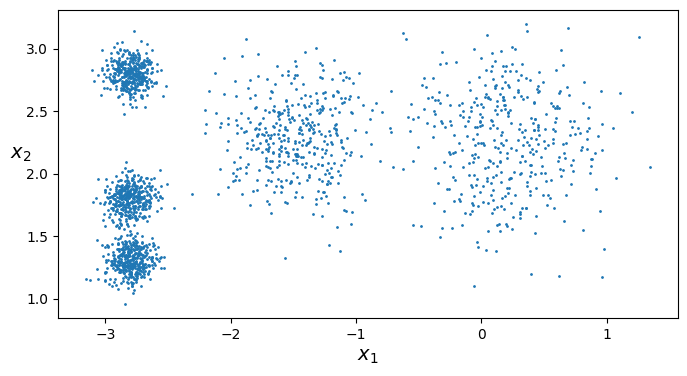

In [20]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [22]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [23]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [24]:
y_pred is kmeans.labels_

True

Estimate clusters

In [25]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

Predicting new instances

In [26]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

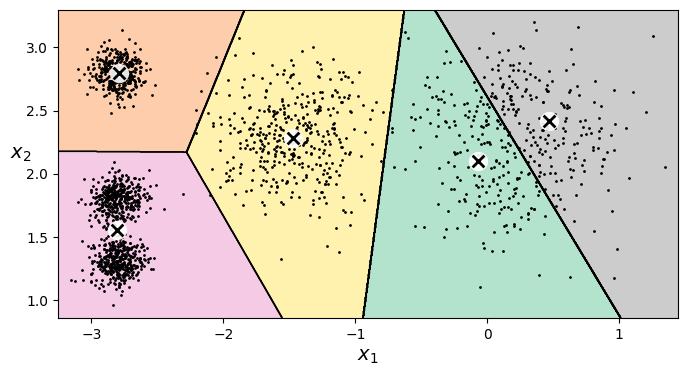

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [29]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

View Euclidian distance between each instance and centroid

In [30]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

# DBSCAN

In [31]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

In [32]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [33]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [34]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [35]:
len(dbscan.core_sample_indices_)

808

In [36]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [37]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [38]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [39]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

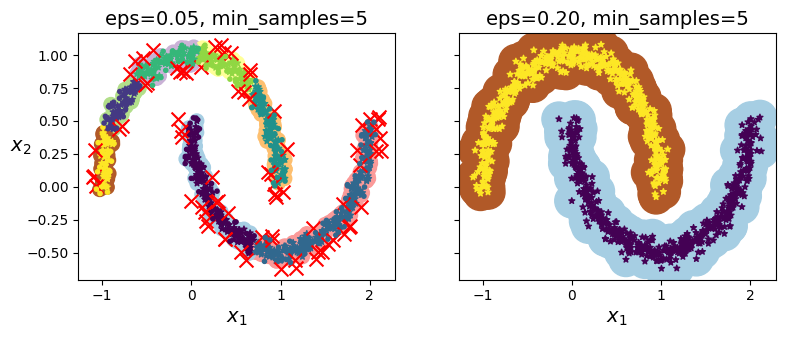

In [40]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


In [41]:
dbscan = dbscan2

In [42]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [44]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

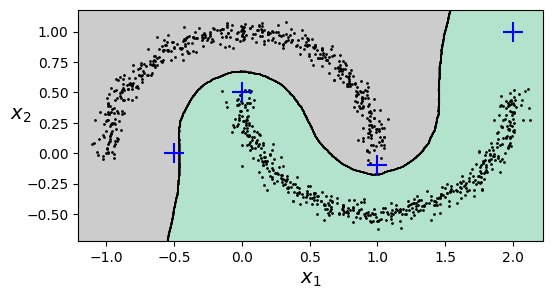

In [45]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

## Spectral Clustering

In [46]:
from sklearn.cluster import SpectralClustering

In [47]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

## Agglomerative Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering